Calculate average, median, standard and range of sleep latency

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

survey_df = pd.read_csv('survey-responses.csv')

def time_to_minutes(time_str):
    if pd.isna(time_str) or time_str == 'X':
        return np.nan
    try:
        time_obj = pd.to_datetime(time_str, format='%H:%M:%S').time()
        total_minutes = time_obj.hour * 60 + time_obj.minute
        return total_minutes
    except:
        return np.nan

survey_df['sleep_latency_minutes'] = survey_df['How long did it take you to fall asleep?'].apply(time_to_minutes)

# Calculate descriptive statistics
mean_latency = survey_df['sleep_latency_minutes'].mean()
median_latency = survey_df['sleep_latency_minutes'].median()
std_latency = survey_df['sleep_latency_minutes'].std()
min_latency = survey_df['sleep_latency_minutes'].min()
max_latency = survey_df['sleep_latency_minutes'].max()

print(f"Average sleep latency: {mean_latency:.2f} minutes")
print(f"Median sleep latency: {median_latency:.2f} minutes")
print(f"Standard deviation: {std_latency:.2f} minutes")
print(f"Range: {min_latency} - {max_latency} minutes")

Average sleep latency: 34.74 minutes
Median sleep latency: 30.00 minutes
Standard deviation: 29.08 minutes
Range: 0 - 120 minutes


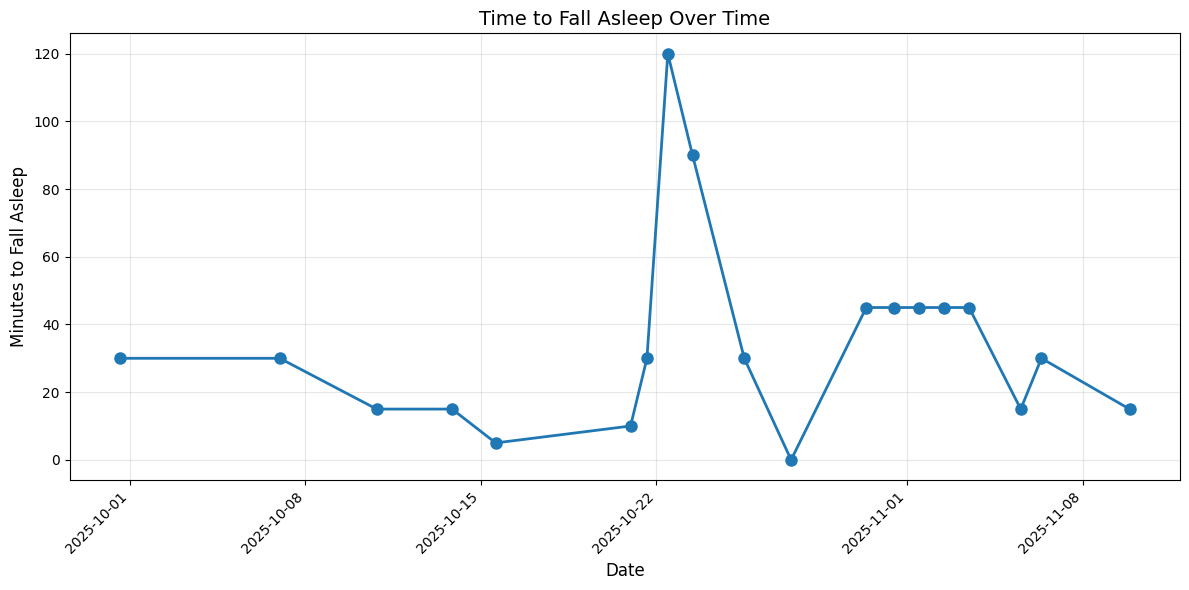

In [2]:
import matplotlib.pyplot as plt

survey_df['sleep_latency_minutes'] = survey_df['How long did it take you to fall asleep?'].apply(time_to_minutes)
survey_df['Timestamp'] = pd.to_datetime(survey_df['Timestamp'], format='%d/%m/%Y %H:%M:%S')

# Filter valid data
valid_data = survey_df[survey_df['sleep_latency_minutes'].notna()].copy()

plt.figure(figsize=(12, 6))
plt.plot(valid_data['Timestamp'], valid_data['sleep_latency_minutes'],
         marker='o', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Minutes to Fall Asleep', fontsize=12)
plt.title('Time to Fall Asleep Over Time', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.savefig('sleep_latency_simple.png', dpi=300, bbox_inches='tight')
plt.show()